In [38]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy import io

# Q1.

In [4]:
def population(pop, t):
    x, y = pop
    dpop_dt = [x*(1 - y), -y*(1 - x)]
    return dpop_dt

In [19]:
initial = tuple([2, 1])
t = np.linspace(0, 10, 1001)

sol = odeint(population, initial, t)
x = sol[:,0]
print("Answer =", x[np.where(t == 2)])

Answer =  [0.49481361]


# Q2.

In [21]:
def curve(x, a0, a1, a2):
    return a0 + a1*x + a2*x**2

In [23]:
x = np.array(list(range(8)))
y = np.array([9, 18, 22, 37, 43, 65, 80, 95])
pars, _ = curve_fit(curve, xdata = x, ydata = y, p0 = [10, 10, 10], maxfev = 100000)

In [25]:
print("a2 =", pars[2])

a2 = 0.9821428571231845


# Q3.

In [65]:
A = np.array([86, 90, 1])
B = np.array([23, 58, 26])
C = np.cross(A,B)
C = C/np.linalg.norm(C)
print(C[2])

0.6762385361337292


# Q4.

In [28]:
A = np.array([2,-3,-2])
B = np.array([5,3,7])
C = np.cross(A,B)
C = C/np.linalg.norm(C)
print(C)

[-0.42562827 -0.68100522  0.59587957]


# Q5.

In [29]:
A = np.array([ [66, 47, 0], [42, 2, 64], [32, 25, 15] ])
B = np.array([ [53, 93], [32, 72], [28, 1] ])
C = A@B
print(C[1,1])

4114


# Q6.

In [31]:
A = np.array([1,2,3,4,5,2,4,7,1,2,3,7,8,5,6,4,1,5,8,10,5,2,6,10,3])
A = A.reshape(5,5)

eigval, eigvec = np.linalg.eig(A)
print(eigval)

[24.43009578  7.77504664 -5.48004748 -0.66430753 -2.06078741]


# Q7.

In [37]:
def eq(x): 
    return (x**4 / 4 - 5*x**3 / 3 - 12 * x**2 /2 + 20*x)

guess_list = list(range(-100, 100))
answers = []
for guess in guess_list:
    x = fsolve(eq, guess)
    answers.append(x[0].round(5))
    
answers = set(answers)
print("Zeros :", answers)

Zeros : {0.0, 8.39068, 2.34384, -4.06785}


# Q8.

Mixed Signal : 50.0
Mixed Signal : 120.0


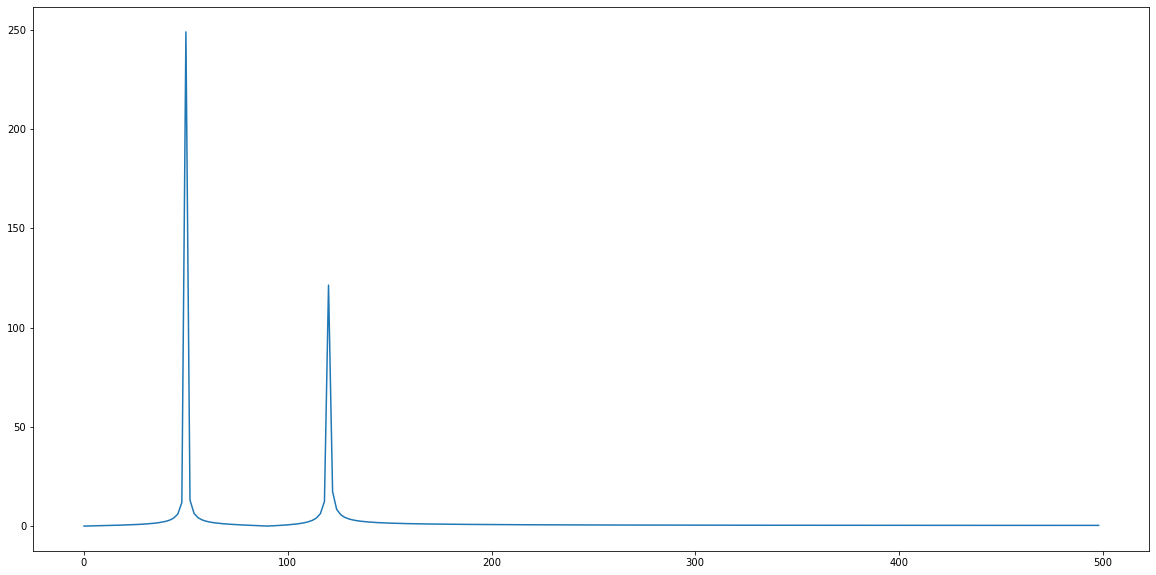

In [60]:
path = '/Users/kunwoosmac/Desktop/data.mat'
data = io.loadmat(path)

s = data['s'][0]
Fs = 1000 # Hz
dt = 1 / Fs

# time vector : n * dt
t = [n*dt for n in list(range(len(s)))]

s_fft = abs(np.fft.fft(s))
fk = [Fs * k / len(s) for k in range(len(s))]

# Only half is useful
s_fft = s_fft[:int(len(s_fft)/2)]
fk = fk[:int(len(fk)/2)]

plt.figure(figsize = (20,10))
plt.plot(fk, s_fft)

threshold = 100
indices = []

for val in s_fft:
    if val > threshold:
        indices.append(np.where(s_fft == val)[0][0])

for index in indices:
    print("Mixed Signal :", fk[int(index)])

# Q9.

In [64]:
# Coefficient Matrix A
A = np.array([ [1,2,-1,0,1], [2,-1,1,-1,1], [5,3,6,-1,-1], [0,1,-8,7,10], [1,1,1,1,1] ])

# Constant Vector b
b = np.array([10, -5, 0, 20, -8])

# Unknown Variable Vector x
x = np.linalg.inv(A)@b

print(x[2])

-19.28000000000002
